In [13]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

The purpose of this script is to demonstrate some common ways of handling 
missing values in attributes.  The script will use the titanic training data.
ALthough it is not done here, any data cleaning done to a training set must be
done to the test set as well.  

The titanic data consists of 12 attributes.  Each attribute set is a 
description about a passenger that was on board the titanic.

Variables:

1. survival --> this is the class label that indicates if the passenger survived or not.  
(0 = No and 1 = Yes)
2. pclass --> A proxy for socio-economic status (SES)
(1=upper, 2=Middle, 3=Lower)
3. sex --> the sex of the passenger
4. Age --> Age of passenger in year
(age: Age is fractional if less than 1. )
(If the age is estimated, is it in the form of xx.5)
5. sibsp --> # of siblings and spouses aboard the Titanic	
(Sibling = brother, sister, stepbrother, stepsister)
(Spouse = husband, wife (mistresses and fiancés were ignored))
6. parch --> # of parents and children aboard the Titanic	
(Parent = mother, father)
(Child = daughter, son, stepdaughter, stepson)
(Some children travelled only with a nanny, therefore parch=0 for them.)
7. ticket --> Ticket number	
8. fare --> ticket price 
9. cabin --> Cabin number	
10. embarked --> Port of Embarkation	
(C = Cherbourg, Q = Queenstown, S = Southampton)

In [14]:
train = pd.read_csv("C:/Users/Norman/Desktop/Code_Repo/Python_Projects/data/Titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. Determining the percent of missing values.

Observation:
Cabin, Age, and Embarked are the only attributes that have missing values.  

In [15]:
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/
# pandas.isnull.html
# https://pandas.pydata.org/pandas-docs/stable/generated/
# pandas.DataFrame.sum.html
# https://pandas.pydata.org/pandas-docs/stable/generated/
# pandas.DataFrame.sort_values.html
# https://pandas.pydata.org/pandas-docs/stable/generated/
# pandas.DataFrame.count.html
missing = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(
        ascending=False)
# https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/
# pandas.concat.html
missing_info = pd.concat([missing, percentage],axis=1,
                         keys=['Missing', 'Percentage'])
missing_info


,Missing,Percentage
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


# 0. A discussion about bias created from missing data.  

If the attribute contains missing values, then the distribution of that 
variable is not representative of the population.  The distribution is not representative of the population.  The sample mean and other sample parameters are biased, which means that on average, the sample mean does not equal the population mean and sample parameters do not equal the population mean.  

# 2. Drop the Na's
The 1st method is to drop columns or rows with missing values.  However, this
should not be so binary.  What I mean by this is that if a column as a few 
missing values, that is not enough missing data to warrant removing the entire
column.  In a case like this, it might make more sense to use method 2, which 
is to impute a value.  

A way to go about this is to set a threshold that determines if a column
should be removed or not.  Lets say the threshold is like 30%.  This means that
if there is more than 30% missing values, then we would drop the column.

Another way to go about this is to only remove attributes with missing values 
if that attribute is not important to the prediction of the label.  Lets say 
that an attribute has like 30% missing values.  However, if this attribute is
important in predicting the label, it might be best to not remove the attribute 
and try to impute the data.  In general, quantitative columns are important to 
predicting labels, so it is best to try to keep these attributes.    

If there is only a few rows missing, removing the rows might not have a huge
impact on the prediction of the label.  However, since there is a few rows
missing, it is easy to just impute the values, so what is the harm of doing
a little more work?

Cabin is removed because there is over 70% missing data and no way of imputing the missing values.

In [16]:
trainCopy = train.copy()
trainCopy.drop('Cabin', axis=1, inplace=True)
trainCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 3. Assigning a value to the missing values

In general, imputation of missing values create models with better accuracy
when compared to models with missing values dropped.  The reason is that
removing missing values means that the data set is worst at capturing
patterns in the population.  

For numerical variables:
The most common imputation value is to use the mean of the variable.  The mean
is the expected value of the variable, so it sort of makes sense to replace missing observations with the value we expect to observe.  

Another common imputation value is to use the median of the variable.  The 
median is preferred over the mean when the sample distribution is skewed.  This
can be determined by simply looking at the histogram. Note that skewness only applies to unimodal distributions and not multimodal distributions.  This means that a non skewed distribution should look approximately normal.  

The imputed value will not exactly be right in the sense that the values are 
systematically above or below the true values.  
The true values refers to the correct values of each observation.  
This is bias that occurs when there are missing values affecting
the distribution of the sample.  
Another downside to imputing values that this further skews the distribution of the sample by affecting the variance of the distribution of the sample.  
By replacing missing observations with the mean or median, the variance becomes smaller.  This can be seen by looking at the variance equation.  The numerator stays the same while the denominator increases.  I think it is possible that this would affect the results of the predictions.  

For categorical variables:
The values for a categorical variable could be inputed with the most frequent 
category as long as there is not a lot of missing values.  
The reason is that there is so few missing values, the mode is definately 
not wrong in the sense that it is the highest frequency category.  
If there was a lot of missing values
for a categorical attribute, you cannot be sure if the mode is wrong or not.  
Lets say there is 300 values for category A, 200 values for category B, and 
200 missing values.  If it turns out that the missing values belong to category
B and we imputed the 200 missing values with the mode, which is category A, 
then we would have made a mistake and erroneously affected the distribution
of the variable. 

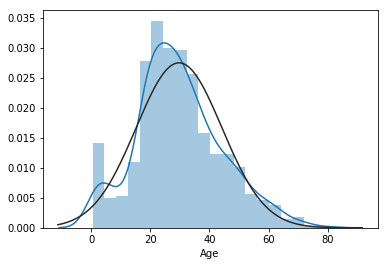

In [24]:
temp = train['Age'].dropna()
# https://seaborn.pydata.org/generated/seaborn.distplot.html
sns.distplot(temp, fit=stats.norm)

The distribution of Age variable looks skewed for a unimodel distrbituion.  It
looks positively skewed.  In this case, it makes more sense to use the median
than the mean.  

In [18]:
# https://pandas.pydata.org/pandas-docs/stable/generated/
# pandas.DataFrame.fillna.html
trainCopy['Age'].fillna(value=trainCopy['Age'].median(), axis=0,inplace=True)

Since embarked only has a few missing values, it is safe to impute the values 
with the mode.  

In [19]:
trainCopy['Embarked'].fillna(value=trainCopy['Embarked'].mode()[0], axis=0,
         inplace=True)
trainCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 4. Special Case: Random Forest Classifier

For random forest classifier, the predictions will be better if we create new
input attributes that keep track of which records have imputed values.  These
new input attributes are to be used as predictors.`

In [28]:
# make new columns indicating which values wil be imputed.  
temp = train.copy()
temp.drop('Cabin', axis=1, inplace=True)
cols_with_missing = (col for col in temp.columns 
                                 if temp[col].isnull().any())
for col in cols_with_missing:
    trainCopy[col + '_missing_tracker'] = trainCopy[col].isnull()
trainCopy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agemissing_tracker,Embarkedmissing_tracker,Age_missing_tracker,Embarked_missing_tracker
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,False,False,False,False
